In [1]:
import pickle
with open('cancer_diagnosis.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [22]:
df= loaded_data
df= df.reset_index()
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


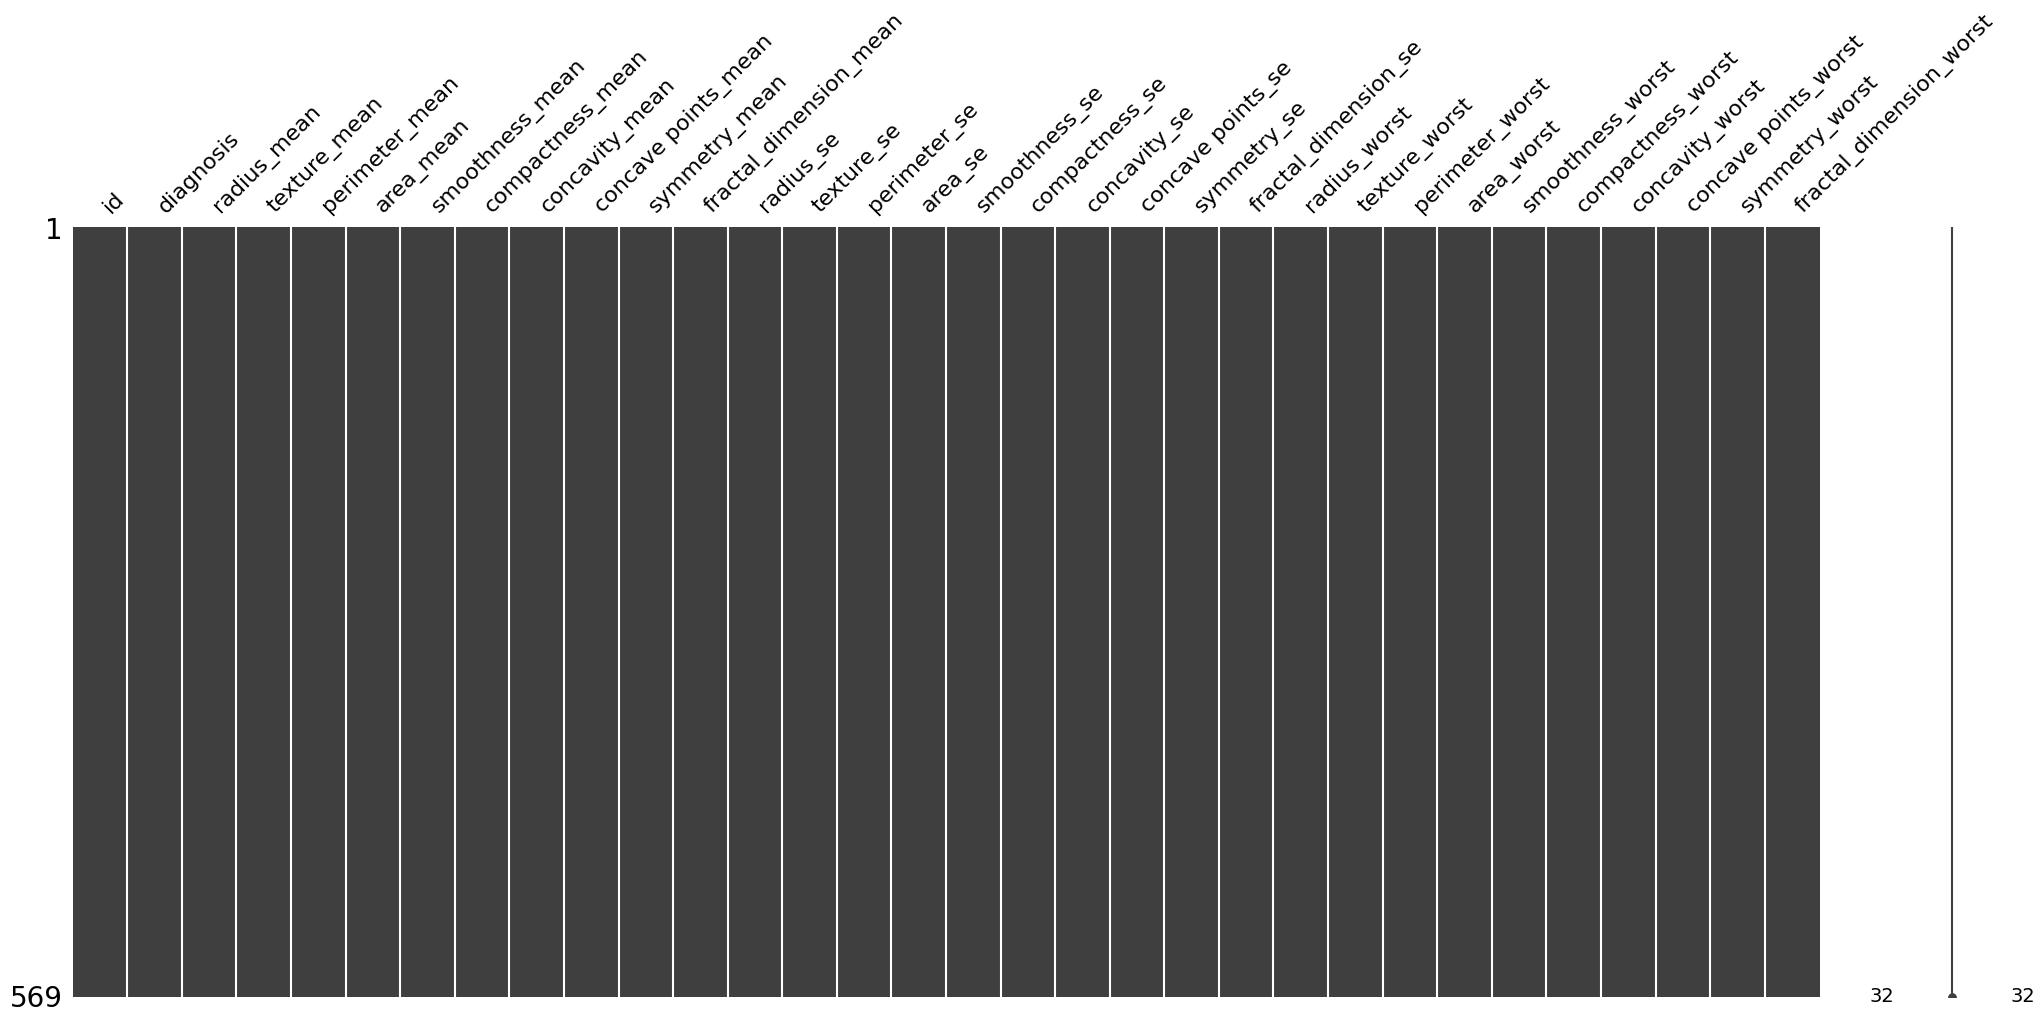

In [23]:
import missingno as msno
msno.matrix(df)
plt.show()

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import seaborn as sns
# Ignore warnings
warnings.filterwarnings('ignore')

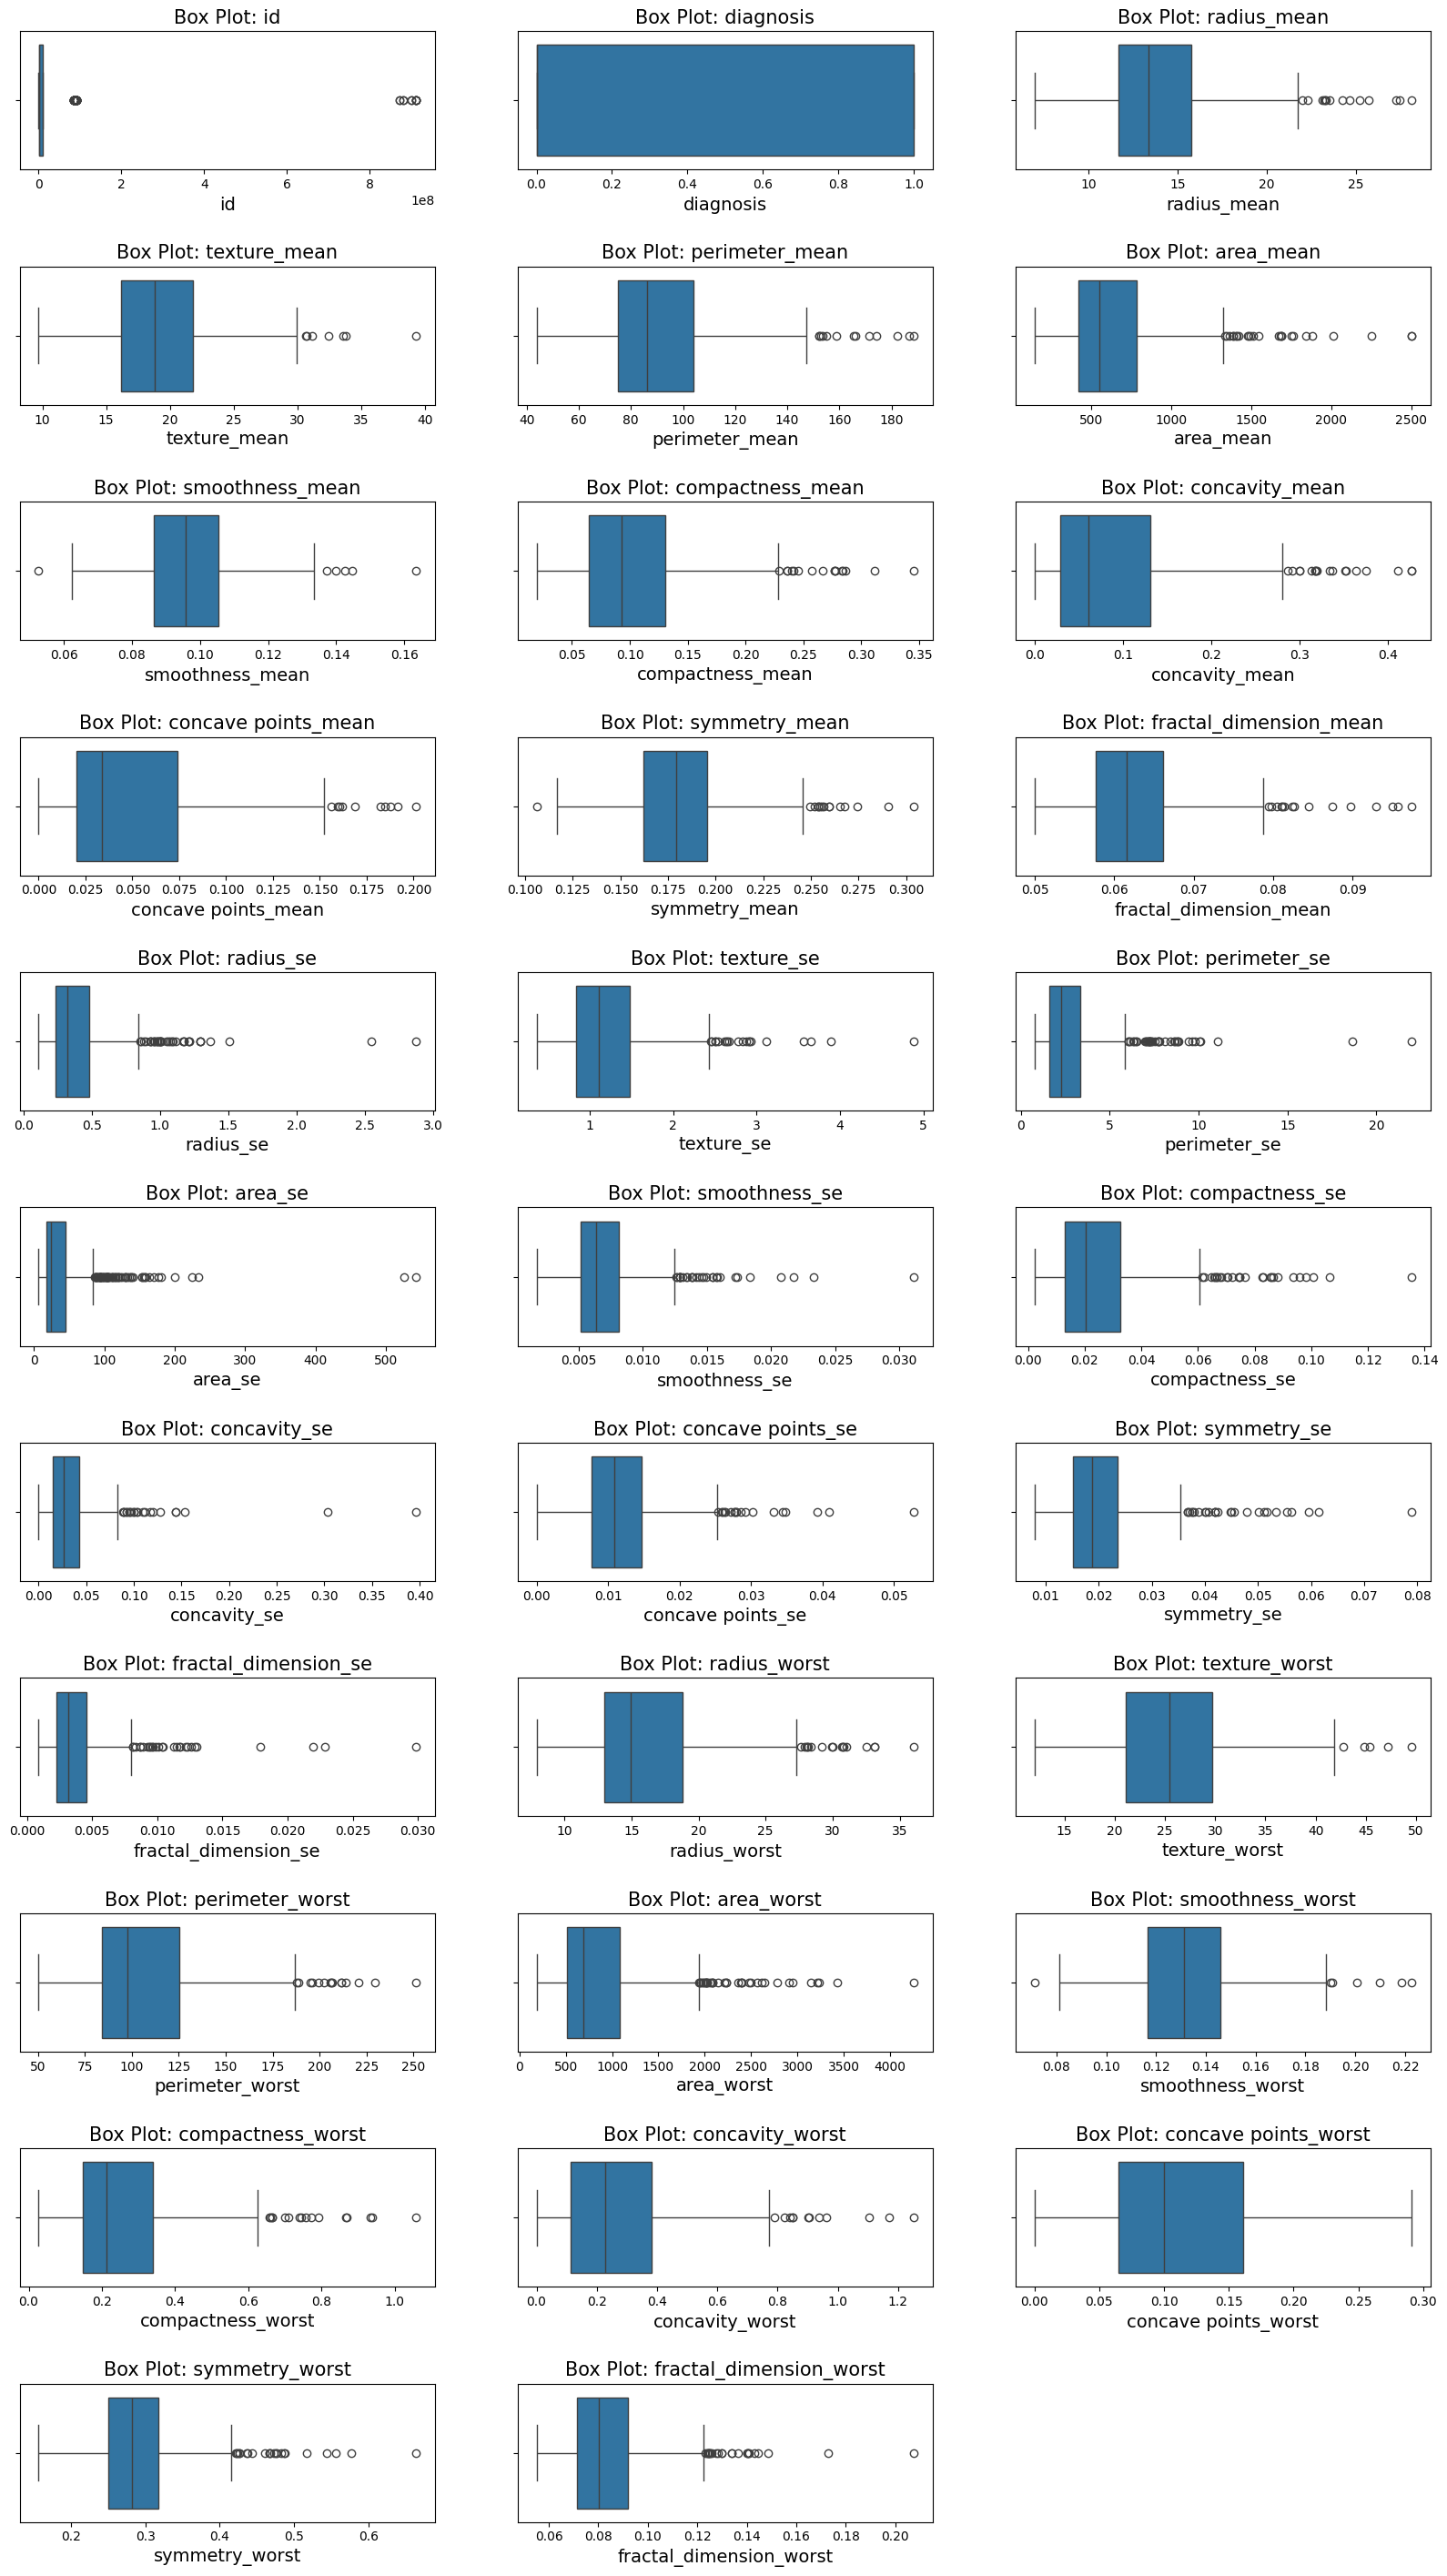

In [25]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df)
plt.show()

In [26]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

In [27]:
df = df.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'})

In [28]:
guassian_cols= ['smoothness_mean', 'texture_worst', 'smoothness_worst', 'concave_points_worst']
con_df= df[guassian_cols]

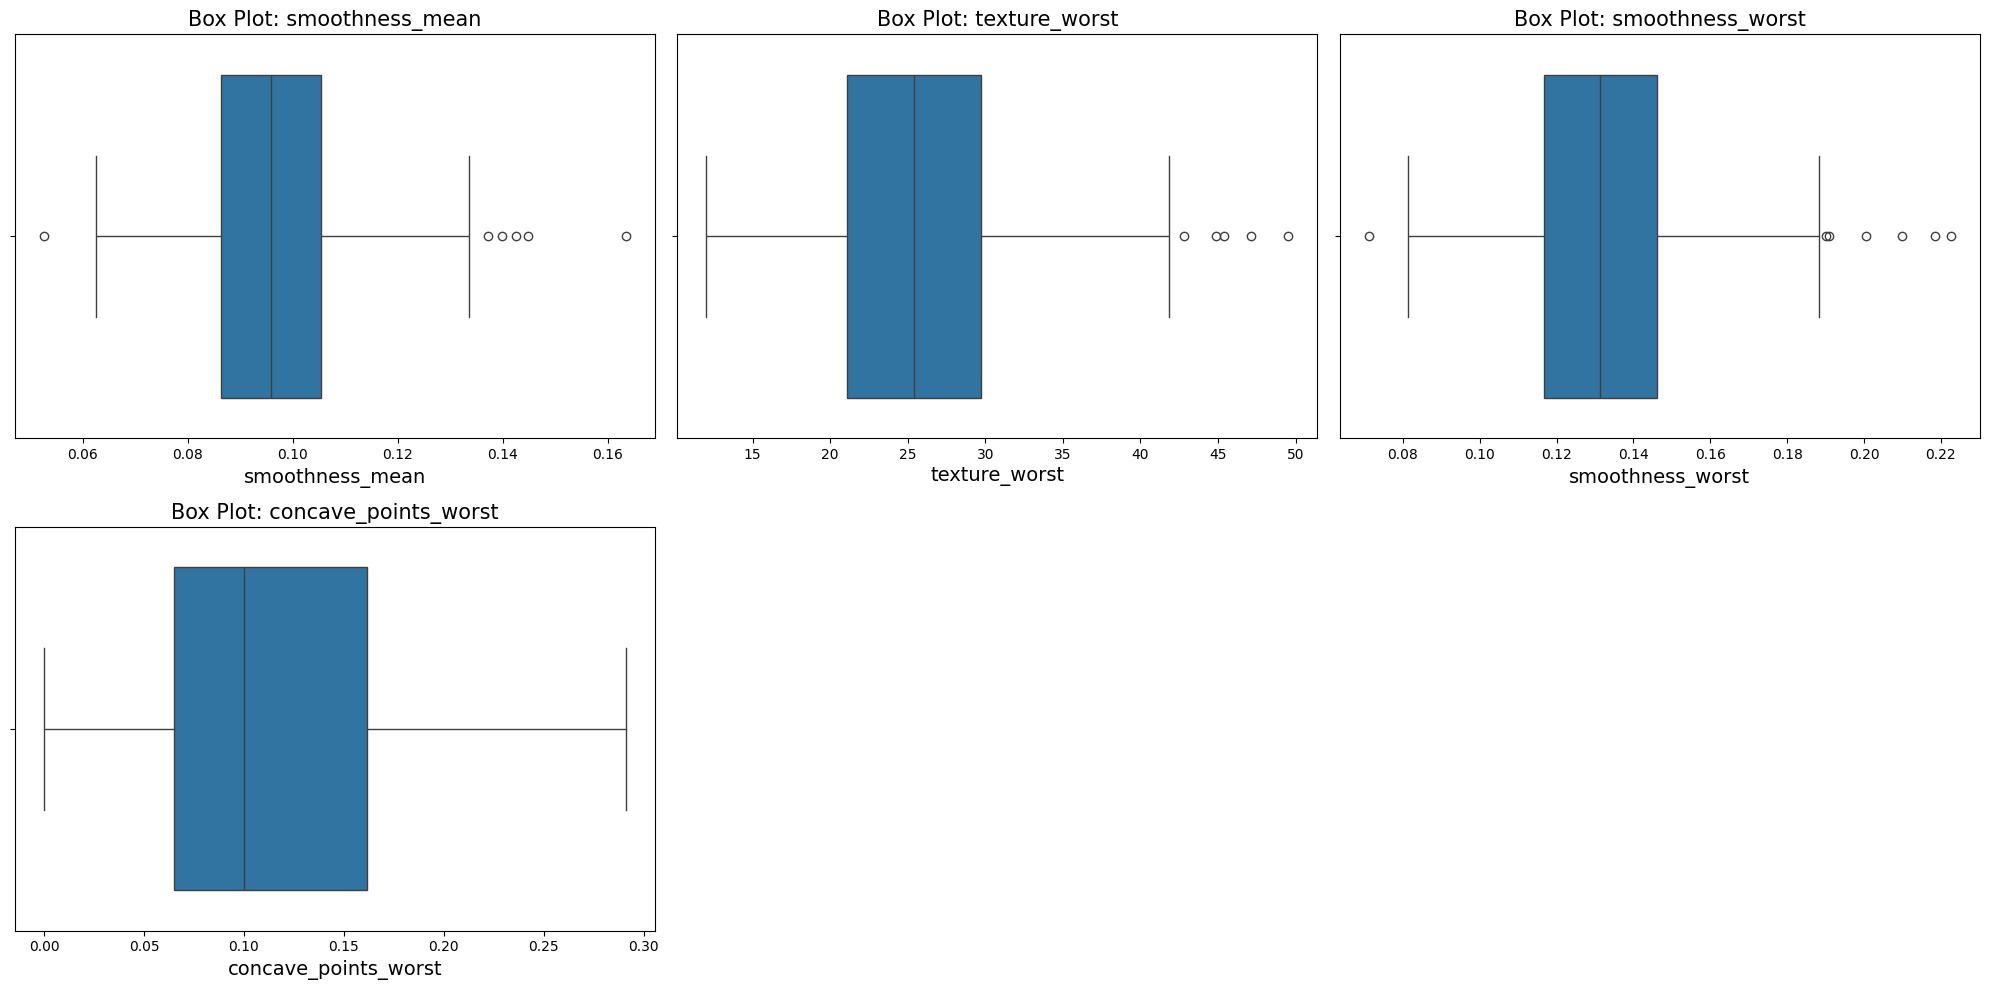

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def outliers_boxplot(df, guassian_cols):
    # Calculate number of rows and columns for the subplot grid
    num_cols = len(guassian_cols)
    num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Determine number of rows needed

    # Create a figure with subplots
    plt.figure(figsize=(20, num_rows * 5))
    
    for i, col in enumerate(guassian_cols):
        ax = plt.subplot(num_rows, 3, i + 1)  # Adjust the grid size
        sns.boxplot(data=df, x=col, ax=ax)
        plt.title('Box Plot: {}'.format(col), fontsize=15)
        plt.xlabel('{}'.format(col), fontsize=14)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# List of columns you want to plot
columns_to_plot = ['smoothness_mean', 'texture_worst', 'smoothness_worst', 'concave_points_worst']

# Call the function with the DataFrame and the list of columns
outliers_boxplot(con_df, columns_to_plot)


In [30]:
z_scores = pd.DataFrame()

for col in guassian_cols:
    z_scores[col] = stats.zscore(con_df[col])

print(z_scores)

     smoothness_mean  texture_worst  smoothness_worst  concave_points_worst
0           1.568466      -1.359293          1.307686              2.296076
1          -0.826962      -0.369203         -0.375612              1.087084
2           0.942210      -0.023974          0.527407              1.955000
3           3.283553       0.133984          3.394275              2.175786
4           0.280372      -1.466770          0.220556              0.729259
..               ...            ...               ...                   ...
564         1.041842       0.117700          0.378365              1.629151
565         0.102458       2.047399         -0.691230              0.733827
566        -0.840484       1.374854         -0.809587              0.414069
567         1.525767       2.237926          1.430427              2.289985
568        -3.112085       0.764190         -1.859019             -1.745063

[569 rows x 4 columns]


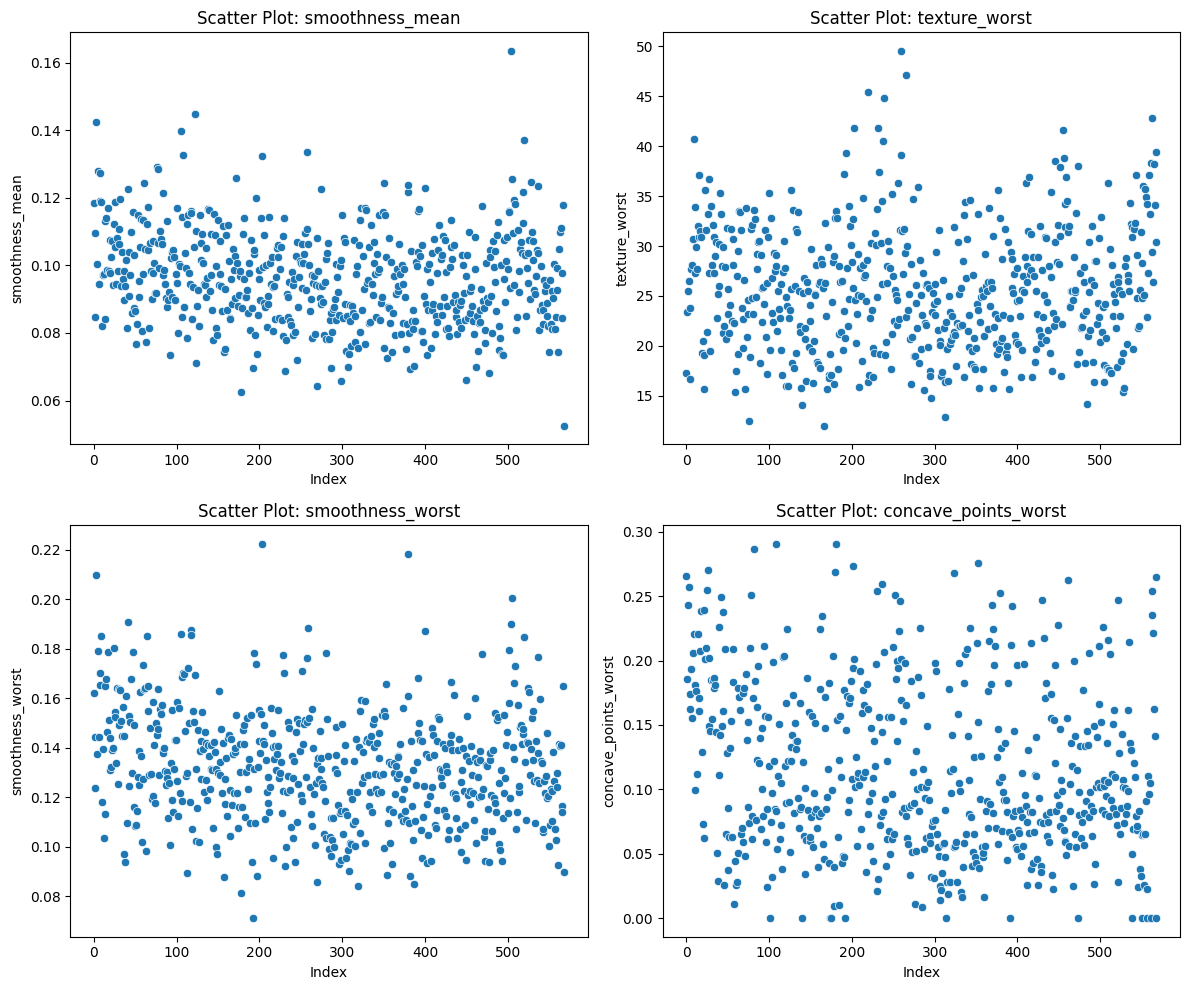

In [31]:
num_cols = len(guassian_cols)
num_rows = (num_cols // 2) + (num_cols % 2)  # Calculate number of rows needed
plt.figure(figsize=(12, num_rows * 5))

# Create scatter plots for each column in 'guassian_cols'
for i, col in enumerate(guassian_cols):
    ax = plt.subplot(num_rows, 2, i + 1)  # Adjust grid size
    sns.scatterplot(x=df.index, y=df[col], ax=ax)
    ax.set_title(f'Scatter Plot: {col}')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Z-Scores:
     smoothness_mean  texture_worst  smoothness_worst  concave_points_worst
0           1.568466      -1.359293          1.307686              2.296076
1          -0.826962      -0.369203         -0.375612              1.087084
2           0.942210      -0.023974          0.527407              1.955000
3           3.283553       0.133984          3.394275              2.175786
4           0.280372      -1.466770          0.220556              0.729259
..               ...            ...               ...                   ...
564         1.041842       0.117700          0.378365              1.629151
565         0.102458       2.047399         -0.691230              0.733827
566        -0.840484       1.374854         -0.809587              0.414069
567         1.525767       2.237926          1.430427              2.289985
568        -3.112085       0.764190         -1.859019             -1.745063

[569 rows x 4 columns]

Filtered DataFrame (excluding high z-scores):
     sm

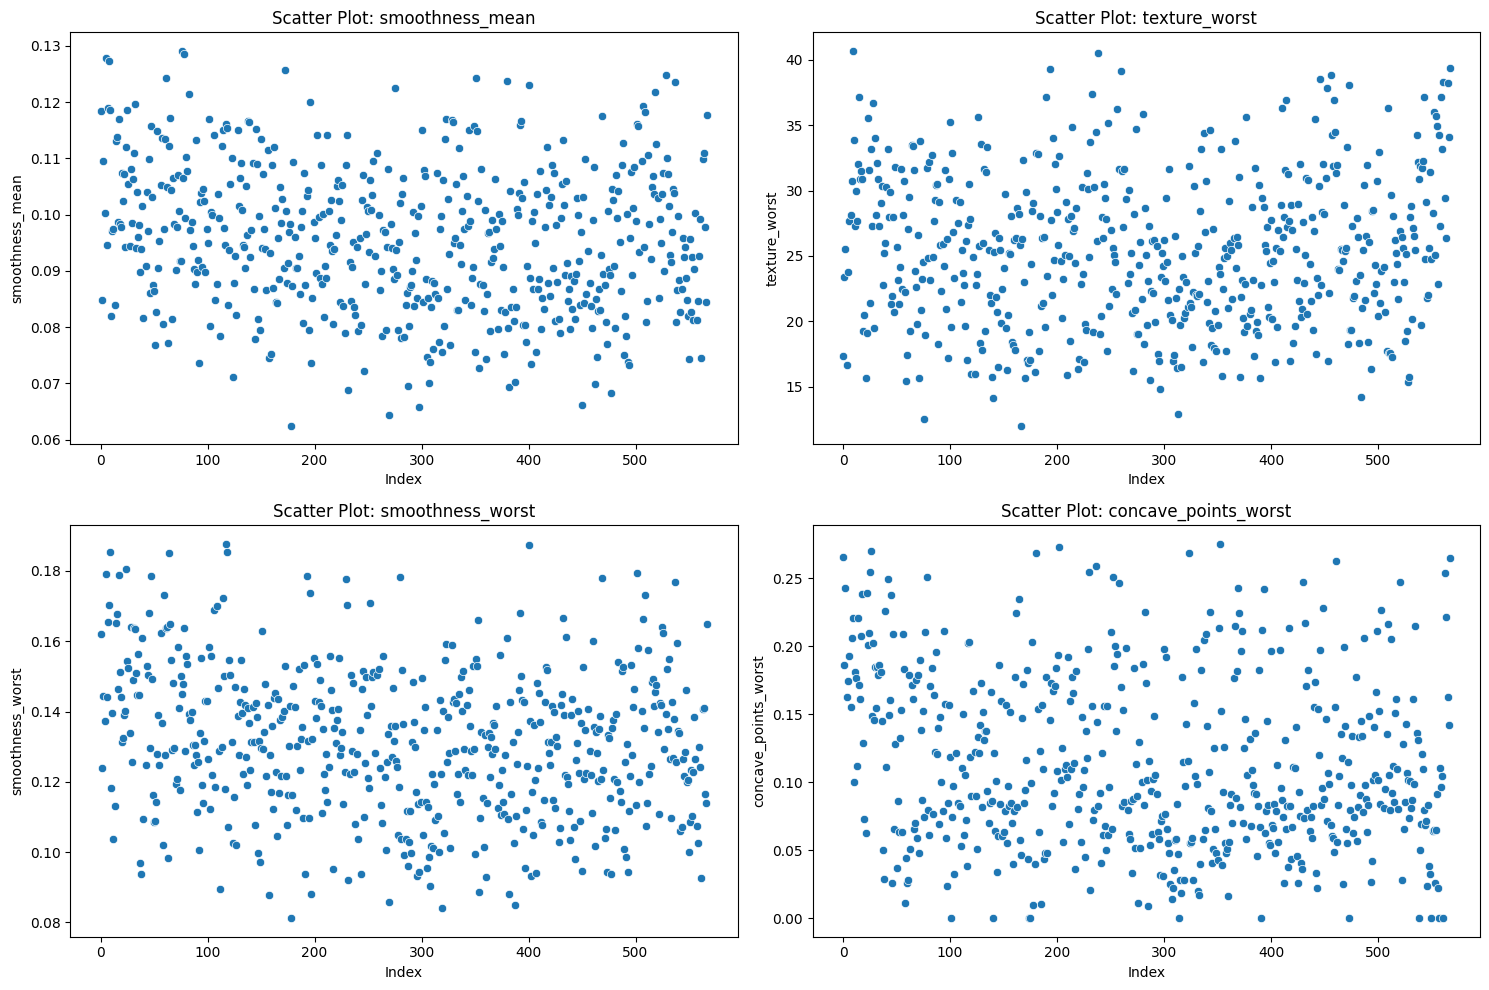

In [32]:
for col in guassian_cols:
    z_scores[col] = stats.zscore(con_df[col])

# Display z-scores to verify the calculation
print("Z-Scores:")
print(z_scores)

# Threshold for filtering
threshold = 2.5

# Create a mask to identify rows where any z-score exceeds the threshold
high_z_scores_mask = (z_scores.abs() <= threshold).all(axis=1)

# Filter the DataFrame to exclude rows where any z-score exceeds the threshold
con_df_filtered = con_df[high_z_scores_mask]

# Display the filtered DataFrame
print("\nFiltered DataFrame (excluding high z-scores):")
print(con_df_filtered)

# Plot each column in 'guassian_cols'
num_cols = len(guassian_cols)
num_rows = (num_cols // 2) + (num_cols % 2)  # Calculate number of rows needed

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(guassian_cols):
    ax = plt.subplot(num_rows, 2, i + 1)  # Create subplot for each column
    sns.scatterplot(x=con_df_filtered.index, y=con_df_filtered[col], ax=ax)
    ax.set_title(f'Scatter Plot: {col}')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [33]:
high_z_scores_mask = (z_scores.abs() > threshold).any(axis=1)

# Identify dropped rows based on high z-scores
dropped_z_scores = z_scores[high_z_scores_mask]

# Display z-scores of dropped rows
print("\nZ-Scores of Dropped Rows:")
print(dropped_z_scores)


Z-Scores of Dropped Rows:
     smoothness_mean  texture_worst  smoothness_worst  concave_points_worst
3           3.283553       0.133984          3.394275              2.175786
41          1.874478       1.573523          2.565776              0.423205
82          0.707364       1.293432          1.092890              2.620403
105         3.091407      -0.533675          2.359748              1.278939
108         2.579016       0.379878          1.653990              2.685877
122         3.440117      -0.274754          1.632072              1.677876
181         1.262455       1.270634          0.733436              2.675218
192        -1.911524      -0.789340         -2.682695             -1.745063
203         2.557666       2.633636          3.955374              1.320051
219        -0.865392       3.213360          0.369598              0.729259
232        -1.320851       2.622237         -1.421536             -1.287960
239         0.125231       3.125425          0.181104        

In [34]:
import pickle
con_df_filtered.to_pickle('con_df_filtered.pkl')

print("Filtered DataFrame has been pickled successfully.")

Filtered DataFrame has been pickled successfully.


In [35]:
con_df_filtered

,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,0.11840,17.33,0.1622,0.2654
1,0.08474,23.41,0.1238,0.1860
2,0.10960,25.53,0.1444,0.2430
4,0.10030,16.67,0.1374,0.1625
5,0.12780,23.75,0.1791,0.1741
...,...,...,...,...
563,0.10990,29.41,0.1407,0.2542
564,0.11100,26.40,0.1410,0.2216
565,0.09780,38.25,0.1166,0.1628
566,0.08455,34.12,0.1139,0.1418
